In [1]:
# Imports
import os
from dotenv import load_dotenv
import requests
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
# Load API key
load_dotenv()

api_key = os.getenv("API_KEY")

# Stock name
ticker = 'NVDA'

### Fetch Data

In [4]:
# Fetch data for a specific date range
def fetch_news(start, end):
    url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&time_from={start}&time_to={end}&sort=EARLIEST&limit=1000&apikey={api_key}"
    response = requests.get(url)
    return response.json()

# Define smaller date ranges to get full coverage
date_ranges = [
    ("20241021T1200", "20241031T1200"),
    ("20241101T1200", "20241110T1200"),
    ("20241111T1200", "20241120T1200"),
    ("20241121T1200", "20241130T1200"),
    ("20241201T1200", "20241210T1200"),
    ("20241211T1200", "20241220T1200"),
    ("20241221T1200", "20241231T1200"),
    ("20250101T1200", "20250110T1200"),
    ("20250111T1200", "20250120T1200"),
    ("20250121T1200", "20250131T1200"),
    ("20250201T1200", "20250211T1200")
]

all_news = []
for start, end in date_ranges:
    print(f"Fetching news from {start} to {end}...")
    data = fetch_news(start, end)
    all_news.extend(data.get("feed", []))
    print(f"Retrieved {len(data.get('feed', []))} articles.")
    
    # Wait to avoid hitting rate limits
    time.sleep(10)

# Print total articles retrieved
print(f"Total articles collected: {len(all_news)}")


Fetching news from 20241021T1200 to 20241031T1200...
Retrieved 388 articles.
Fetching news from 20241101T1200 to 20241110T1200...
Retrieved 308 articles.
Fetching news from 20241111T1200 to 20241120T1200...
Retrieved 396 articles.
Fetching news from 20241121T1200 to 20241130T1200...
Retrieved 330 articles.
Fetching news from 20241201T1200 to 20241210T1200...
Retrieved 332 articles.
Fetching news from 20241211T1200 to 20241220T1200...
Retrieved 348 articles.
Fetching news from 20241221T1200 to 20241231T1200...
Retrieved 320 articles.
Fetching news from 20250101T1200 to 20250110T1200...
Retrieved 411 articles.
Fetching news from 20250111T1200 to 20250120T1200...
Retrieved 388 articles.
Fetching news from 20250121T1200 to 20250131T1200...
Retrieved 510 articles.
Fetching news from 20250201T1200 to 20250211T1200...
Retrieved 370 articles.
Total articles collected: 4101


In [5]:
data['sentiment_score_definition'], data['relevance_score_definition']

('x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish',
 '0 < x <= 1, with a higher score indicating higher relevance.')

In [6]:
news = pd.DataFrame(all_news)
news.head()

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
0,"IBM Expands Open-Source AI with Granite 3.0, E...",https://www.benzinga.com/markets/equities/24/1...,20241021T120038,[Anusuya Lahiri],International Business Machines Corp IBM showc...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,News,www.benzinga.com,"[{'topic': 'Technology', 'relevance_score': '0...",0.323928,Somewhat-Bullish,"[{'ticker': 'GOOG', 'relevance_score': '0.2629..."
1,Is Microsoft Going to $505? 1 Wall Street Anal...,https://www.fool.com/investing/2024/10/21/is-m...,20241021T122500,[Jeremy Bowman],KeyBanc just raised its price target on Micros...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.169953,Somewhat-Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.8403..."
2,"Bitcoin on Track to Hit $70,000: 4 Crypto-Cent...",https://www.zacks.com/stock/news/2353863/bitco...,20241021T122800,[Ritujay Ghosh],"Bitcoin-centric stocks like NVDA, CME, IBKR an...",https://staticx-tuner.zacks.com/images/article...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'Economy - Monetary', 'relevance_sc...",0.291836,Somewhat-Bullish,"[{'ticker': 'NVDA', 'relevance_score': '0.3116..."
3,3 Artificial Intelligence Stocks No One Is Tal...,https://www.fool.com/investing/2024/10/21/3-ar...,20241021T125334,[George Budwell],These three under-the-radar AI stocks are posi...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Manufacturing', 'relevance_score':...",0.255176,Somewhat-Bullish,"[{'ticker': 'IREN', 'relevance_score': '0.2015..."
4,NVIDIA Corporation ( NVDA ) is Attracting In...,https://www.zacks.com/stock/news/2353726/nvidi...,20241021T130016,[Zacks Equity Research],Nvidia (NVDA) has been one of the stocks most ...,https://staticx-tuner.zacks.com/images/default...,Zacks Commentary,n/a,www.zacks.com,"[{'topic': 'Earnings', 'relevance_score': '1.0...",0.250428,Somewhat-Bullish,"[{'ticker': 'NVDA', 'relevance_score': '0.4811..."


In [7]:
# Get nvda specific scores
def get_nvda_scores(scores):
    for ticker in scores:
        if ticker['ticker'] == 'NVDA':
            return ticker

news = news.join(pd.DataFrame(news['ticker_sentiment'].apply(get_nvda_scores).tolist()))
news['relevance_score'] = news['relevance_score'].astype(float)
news['ticker_sentiment_score'] = news['ticker_sentiment_score'].astype(float)

# Keep only relevant articles
news = news[news['relevance_score'] > 0.5]

news.head()

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment,ticker,relevance_score,ticker_sentiment_score,ticker_sentiment_label
18,Nvidia Joins Big Tech Hyperscalers At HLTH Con...,https://www.benzinga.com/markets/equities/24/1...,20241021T181952,[Anusuya Lahiri],"Tech giants like Nvidia Corp NVDA, Alphabet In...",https://editorial-assets.benzinga.com/wp-conte...,Benzinga,News,www.benzinga.com,"[{'topic': 'Technology', 'relevance_score': '0...",0.362124,Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.4024...",NVDA,0.708903,0.529178,Bullish
19,Think It's Too Late to Buy Nvidia? Here's the ...,https://www.fool.com/investing/2024/10/21/too-...,20241021T182908,[Howard Smith],Check out the data center prediction Jensen Hu...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.283644,Somewhat-Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.2259...",NVDA,0.610896,0.490024,Bullish
21,Nvidia Stock Hits All-Time High Ahead Of Big T...,https://www.benzinga.com/news/24/10/41437976/n...,20241021T191010,[Vaishali Prayag],Nvidia Inc.'s NVDA shares are hitting new all-...,https://editorial-assets.benzinga.com/wp-conte...,Benzinga,News,www.benzinga.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.258186,Somewhat-Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.0778...",NVDA,0.717589,0.311481,Somewhat-Bullish
22,NVIDIA's Options Frenzy: What You Need to Know...,https://www.benzinga.com/insights/options/24/1...,20241021T204538,[Benzinga Insights],Deep-pocketed investors have adopted a bullish...,https://www.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.149292,Neutral,"[{'ticker': 'GS', 'relevance_score': '0.066414...",NVDA,0.756655,0.229060,Somewhat-Bullish
29,2 Stock-Split Artificial Intelligence ( AI ) ...,https://www.fool.com/investing/2024/10/22/2-st...,20241022T080400,[Trevor Jennewine],These artificial intelligence stocks have gene...,https://g.foolcdn.com/editorial/images/794787/...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.233253,Somewhat-Bullish,"[{'ticker': 'NVDA', 'relevance_score': '0.5107...",NVDA,0.510742,0.469583,Bullish


In [8]:
# Change publish time to datetime
news['time_published'] = pd.to_datetime(news['time_published'], format="%Y%m%dT%H%M%S")
news.head()

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment,ticker,relevance_score,ticker_sentiment_score,ticker_sentiment_label
18,Nvidia Joins Big Tech Hyperscalers At HLTH Con...,https://www.benzinga.com/markets/equities/24/1...,2024-10-21 18:19:52,[Anusuya Lahiri],"Tech giants like Nvidia Corp NVDA, Alphabet In...",https://editorial-assets.benzinga.com/wp-conte...,Benzinga,News,www.benzinga.com,"[{'topic': 'Technology', 'relevance_score': '0...",0.362124,Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.4024...",NVDA,0.708903,0.529178,Bullish
19,Think It's Too Late to Buy Nvidia? Here's the ...,https://www.fool.com/investing/2024/10/21/too-...,2024-10-21 18:29:08,[Howard Smith],Check out the data center prediction Jensen Hu...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.283644,Somewhat-Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.2259...",NVDA,0.610896,0.490024,Bullish
21,Nvidia Stock Hits All-Time High Ahead Of Big T...,https://www.benzinga.com/news/24/10/41437976/n...,2024-10-21 19:10:10,[Vaishali Prayag],Nvidia Inc.'s NVDA shares are hitting new all-...,https://editorial-assets.benzinga.com/wp-conte...,Benzinga,News,www.benzinga.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.258186,Somewhat-Bullish,"[{'ticker': 'MSFT', 'relevance_score': '0.0778...",NVDA,0.717589,0.311481,Somewhat-Bullish
22,NVIDIA's Options Frenzy: What You Need to Know...,https://www.benzinga.com/insights/options/24/1...,2024-10-21 20:45:38,[Benzinga Insights],Deep-pocketed investors have adopted a bullish...,https://www.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.149292,Neutral,"[{'ticker': 'GS', 'relevance_score': '0.066414...",NVDA,0.756655,0.229060,Somewhat-Bullish
29,2 Stock-Split Artificial Intelligence ( AI ) ...,https://www.fool.com/investing/2024/10/22/2-st...,2024-10-22 08:04:00,[Trevor Jennewine],These artificial intelligence stocks have gene...,https://g.foolcdn.com/editorial/images/794787/...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.233253,Somewhat-Bullish,"[{'ticker': 'NVDA', 'relevance_score': '0.5107...",NVDA,0.510742,0.469583,Bullish


### EDA

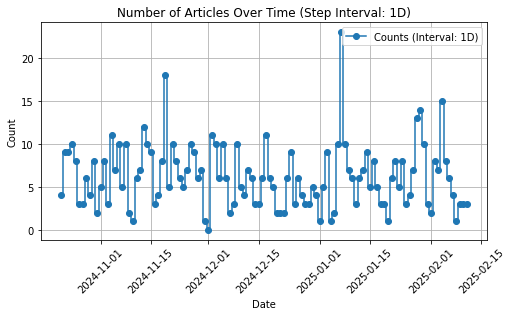

In [10]:
step_interval = "1D"

# Aggregate data into bins of step_interval
df_binned = news.resample(step_interval, on="time_published").count().reset_index()

# Plot the combined step plot
plt.figure(figsize=(8, 4))
plt.step(df_binned["time_published"], df_binned["url"], where="mid", marker="o", linestyle="-", label=f"Counts (Interval: {step_interval})")

plt.xlabel("Date")
plt.ylabel("Count")
plt.title(f"Number of Articles Over Time (Step Interval: {step_interval})")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()

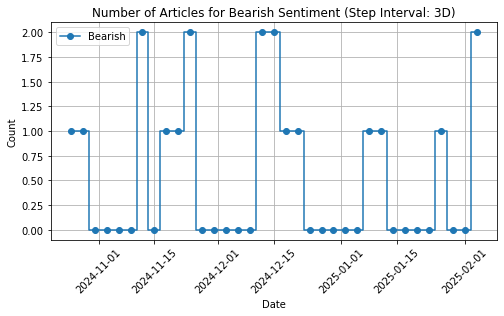

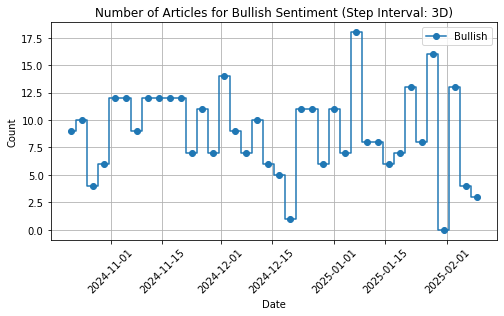

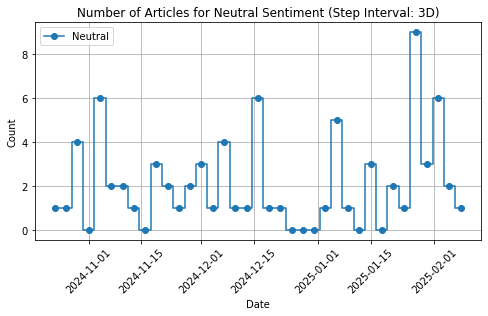

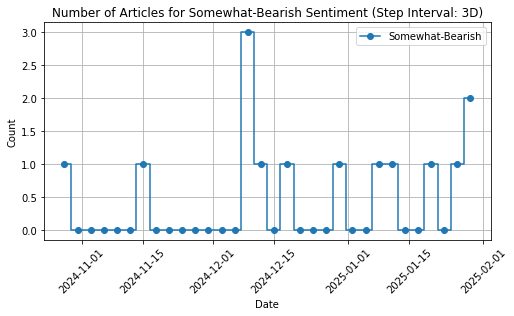

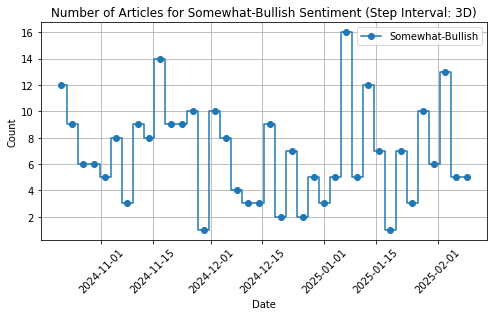

In [11]:
step_interval = "3D"

# Loop through each sentiment label and create separate plots
for sentiment, group in news.groupby("ticker_sentiment_label"):
    group_resampled = group.resample(step_interval, on="time_published").count().reset_index()

    plt.figure(figsize=(8, 4))
    plt.step(group_resampled["time_published"], group_resampled["url"], where="mid", marker="o", linestyle="-", label=str(sentiment))

    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.title(f"Number of Articles for {sentiment} Sentiment (Step Interval: {step_interval})")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    plt.show()

In [12]:
# Article sources
news['source'].unique()

array(['Benzinga', 'Motley Fool', 'Zacks Commentary', 'CNBC',
       'GlobeNewswire', 'Cointelegraph', 'Business Insider',
       'The Economist', 'South China Morning Post'], dtype=object)

<Axes: title={'center': 'Sentiment Score Distribution'}, xlabel='Sentiment Score', ylabel='Frequency'>

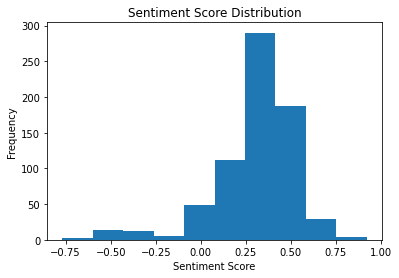

In [13]:
news['ticker_sentiment_score'].plot(kind='hist', title='Sentiment Score Distribution', xlabel='Sentiment Score')

<Axes: title={'center': 'Relevance Score Distribution'}, xlabel='Relevance Score', ylabel='Frequency'>

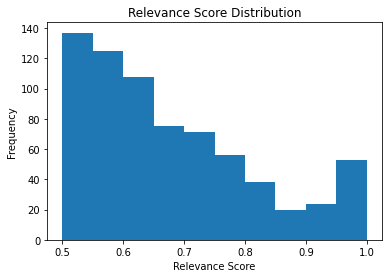

In [14]:
news['relevance_score'].plot(kind='hist', title='Relevance Score Distribution', xlabel='Relevance Score')

<Axes: title={'center': 'Sentiment Labels Distribution'}, xlabel='Sentiment Label'>

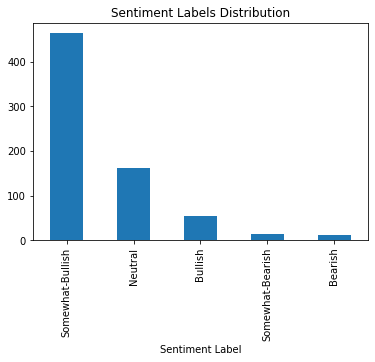

In [15]:
news['overall_sentiment_label'].value_counts().plot(kind='bar', title='Sentiment Labels Distribution', xlabel='Sentiment Label')

In [16]:
news = news[['title', 'url', 'time_published', 'authors', 'summary', 'relevance_score', 'ticker_sentiment_score', 'ticker_sentiment_label']]

In [17]:
# save/read data
news.to_csv('nvda_news.csv', index=False)
#news = pd.read_csv('nvda_news.csv', parse_dates=['time_published'])
news.head()

,title,url,time_published,authors,summary,relevance_score,ticker_sentiment_score,ticker_sentiment_label
18,Nvidia Joins Big Tech Hyperscalers At HLTH Con...,https://www.benzinga.com/markets/equities/24/1...,2024-10-21 18:19:52,[Anusuya Lahiri],"Tech giants like Nvidia Corp NVDA, Alphabet In...",0.708903,0.529178,Bullish
19,Think It's Too Late to Buy Nvidia? Here's the ...,https://www.fool.com/investing/2024/10/21/too-...,2024-10-21 18:29:08,[Howard Smith],Check out the data center prediction Jensen Hu...,0.610896,0.490024,Bullish
21,Nvidia Stock Hits All-Time High Ahead Of Big T...,https://www.benzinga.com/news/24/10/41437976/n...,2024-10-21 19:10:10,[Vaishali Prayag],Nvidia Inc.'s NVDA shares are hitting new all-...,0.717589,0.311481,Somewhat-Bullish
22,NVIDIA's Options Frenzy: What You Need to Know...,https://www.benzinga.com/insights/options/24/1...,2024-10-21 20:45:38,[Benzinga Insights],Deep-pocketed investors have adopted a bullish...,0.756655,0.229060,Somewhat-Bullish
29,2 Stock-Split Artificial Intelligence ( AI ) ...,https://www.fool.com/investing/2024/10/22/2-st...,2024-10-22 08:04:00,[Trevor Jennewine],These artificial intelligence stocks have gene...,0.510742,0.469583,Bullish


### Average Sentiment Scores

In [19]:
news['date'] = news['time_published'].dt.date

# Compute daily averages
daily_avg = news.groupby('date')['ticker_sentiment_score'].mean().reset_index()

# Apply rolling averages
daily_avg['avg_1d'] = daily_avg['ticker_sentiment_score'].rolling(1).mean()
daily_avg['avg_3d'] = daily_avg['ticker_sentiment_score'].rolling(3).mean()
daily_avg['avg_5d'] = daily_avg['ticker_sentiment_score'].rolling(5).mean()
daily_avg['avg_7d'] = daily_avg['ticker_sentiment_score'].rolling(7).mean()
daily_avg['avg_10d'] = daily_avg['ticker_sentiment_score'].rolling(10).mean()

daily_avg = daily_avg.dropna()

In [20]:
daily_avg

,date,ticker_sentiment_score,avg_1d,avg_3d,avg_5d,avg_7d,avg_10d
9,2024-10-30,0.229389,0.229389,0.179262,0.246098,0.269754,0.297853
10,2024-10-31,0.457764,0.457764,0.253637,0.280575,0.283891,0.304636
11,2024-11-01,0.296796,0.296796,0.327983,0.258469,0.283578,0.303098
12,2024-11-02,0.464111,0.464111,0.406224,0.304364,0.309111,0.310695
13,2024-11-03,0.344659,0.344659,0.368522,0.358544,0.300160,0.309280
...,...,...,...,...,...,...,...
108,2025-02-07,0.394436,0.394436,0.340391,0.311903,0.264863,0.242924
109,2025-02-08,0.275157,0.275157,0.302880,0.298339,0.279304,0.246073
110,2025-02-09,0.177525,0.177525,0.282373,0.294771,0.287457,0.234679
111,2025-02-10,0.447993,0.447993,0.300225,0.306831,0.302459,0.275472


In [25]:
daily_avg.to_csv('data/avg_news_sentiment.csv')